In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime

In [2]:
company= 'BAJFINANCE.NS'
endDate= '2023-01-26'

In [3]:
df= yf.download(company, period='max', end= endDate)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,5.239737,5.540927,5.239737,5.412679,3.952735,21923
2002-07-02,5.523439,5.537041,5.421423,5.443769,3.975439,61044
2002-07-03,5.505950,5.545785,5.328151,5.466116,3.991760,34160
2002-07-04,5.501093,5.572018,5.417537,5.528297,4.037168,27892
2002-07-05,5.563274,5.656546,5.474860,5.590478,4.082577,58976
...,...,...,...,...,...,...
2023-01-19,5983.000000,6029.649902,5960.649902,6012.450195,5961.166504,548142
2023-01-20,6012.500000,6019.750000,5837.200195,5860.399902,5810.413086,833090
2023-01-23,5881.000000,5935.000000,5841.000000,5863.000000,5812.990723,856064


In [4]:
trainSet= df.iloc[:, 1:2].values

In [5]:
df.shape

(5113, 6)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(0,1))

In [7]:
trainingSetScaled= scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [46]:
xTRAIN = []
yTRAIN = []

for i in range(100, len(trainingSetScaled)):
    xTRAIN.append(trainingSetScaled[i-14:i, 0])
    yTRAIN.append(trainingSetScaled[i, 0])
    
xTRAIN, yTRAIN= np.array(xTRAIN), np.array(yTRAIN)

In [47]:
xTRAIN= np.reshape(xTRAIN, newshape=(xTRAIN.shape[0], xTRAIN.shape[1], 1))

In [48]:
trainingSetScaled.shape

(5113, 1)

In [49]:
xTRAIN.shape

(5013, 14, 1)

In [50]:
yTRAIN.shape

(5013,)

In [51]:
import tensorflow as tf
from tensorflow import keras


if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

In [52]:
regressor= keras.models.Sequential([
    keras.layers.LSTM(units=84, return_sequences= True, input_shape= (xTRAIN.shape[1], 1)),
    keras.layers.Dropout(rate= 0.2),
    keras.layers.LSTM(units=64, return_sequences= True), 
    keras.layers.Dropout(rate= 0.2),
    keras.layers.LSTM(units=50), 
    keras.layers.Dropout(rate= 0.2),
    keras.layers.Dense(units= 1)
])

In [53]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 14, 84)            28896     
                                                                 
 dropout_3 (Dropout)         (None, 14, 84)            0         
                                                                 
 lstm_4 (LSTM)               (None, 14, 64)            38144     
                                                                 
 dropout_4 (Dropout)         (None, 14, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                23000     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [54]:
regressor.compile(optimizer= 'adam', loss= keras.losses.mean_squared_error, metrics=['accuracy'])

In [ ]:
regressor.fit(x= xTRAIN, y=yTRAIN, batch_size= 32, epochs= 120)

Epoch 1/120
157/157 [==============================] - 5s 11ms/step - loss: 0.0050 - accuracy: 1.9948e-04
Epoch 2/120
157/157 [==============================] - 2s 11ms/step - loss: 0.0016 - accuracy: 1.9948e-04
Epoch 3/120
157/157 [==============================] - 2s 11ms/step - loss: 0.0013 - accuracy: 1.9948e-04
Epoch 4/120
157/157 [==============================] - 2s 14ms/step - loss: 0.0011 - accuracy: 1.9948e-04
Epoch 5/120
157/157 [==============================] - 2s 11ms/step - loss: 0.0011 - accuracy: 1.9948e-04
Epoch 6/120
157/157 [==============================] - 2s 10ms/step - loss: 0.0011 - accuracy: 1.9948e-04
Epoch 7/120
157/157 [==============================] - 2s 10ms/step - loss: 0.0012 - accuracy: 1.9948e-04
Epoch 8/120
157/157 [==============================] - 2s 10ms/step - loss: 0.0011 - accuracy: 1.9948e-04
Epoch 9/120
157/157 [==============================] - 2s 10ms/step - loss: 0.0010 - accuracy: 1.9948e-04
Epoch 10/120
157/157 [========================

In [18]:
prdctn= regressor.predict(xTRAIN)

157/157 [==============================] - 2s 8ms/step


regressor.save(f"../model/exports/{company}/")

In [19]:
testDF= yf.download(company, period='1d', start=endDate, end=datetime.datetime.now())
testDF

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-27,5815.000000,5861.549805,5680.000000,5760.700195,5711.563477,1621352
2023-01-30,5770.049805,6066.200195,5770.049805,6021.799805,5970.436035,2448160
2023-01-31,6050.000000,6050.000000,5874.000000,5886.399902,5836.190918,1996788
2023-02-01,5944.000000,5980.399902,5708.899902,5817.200195,5767.581543,2634866
2023-02-02,5819.000000,5819.000000,5645.000000,5717.649902,5668.880371,2025044
...,...,...,...,...,...,...
2023-09-08,7390.000000,7449.950195,7370.000000,7410.649902,7410.649902,624642
2023-09-11,7425.000000,7444.000000,7362.000000,7391.649902,7391.649902,406849
2023-09-12,7421.000000,7459.000000,7305.500000,7431.299805,7431.299805,963517


In [20]:
realCP= testDF['Close'].values

In [21]:
dfTotal= pd.concat((df['Close'], testDF['Close']), axis=0)

In [22]:
modelInp= dfTotal[len(dfTotal)-len(testDF)-60:].values

In [23]:
modelInp= modelInp.reshape(-1,1)

In [24]:
modelInp= scaler.transform(modelInp)

In [44]:
xTEST= []

for i in range(60, len(modelInp)):
    xTEST.append(modelInp[i-60:i, 0])

xTEST= np.array(xTEST)

In [45]:
xTEST.shape

(157, 60)

In [27]:
xTEST= np.reshape(xTEST, newshape= (xTEST.shape[0], xTEST.shape[1], 1))

In [28]:
#pred = pred[..., 0]

In [29]:
pred= regressor.predict(xTEST)

5/5 [==============================] - 0s 10ms/step


In [30]:
pred= scaler.inverse_transform(pred)

In [31]:
pred.shape

(157, 1)

In [32]:
import matplotlib.pyplot as plt

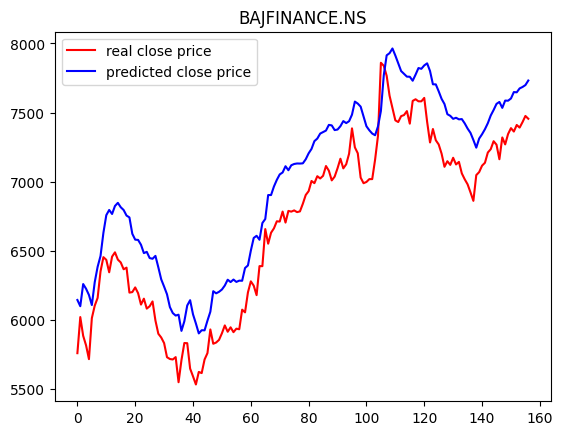

In [33]:
plt.plot(realCP, color= 'r', label= 'real close price')
plt.plot(pred, color= 'b', label= 'predicted close price')
plt.title(company)
plt.legend()
plt.show()

In [34]:
realData= [modelInp[len(modelInp)+1-60:len(modelInp+1), 0]]

In [35]:
realData= np.array(realData)

In [36]:
realData= np.reshape(realData, newshape=(realData.shape[0], realData.shape[1], 1))

In [37]:
prediction= regressor.predict(realData)

1/1 [==============================] - 1s 1s/step


In [38]:
prediction= scaler.inverse_transform(prediction)

In [39]:
prediction

array([[7734.0947]], dtype=float32)

# Load your Keras model
#model = tf.keras.models.load_model('../model/exports/ITC.NS/')

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(regressor)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.experimental_lower_tensor_list_ops = False  # Disable lowering of tensor list ops
tflite_model = converter.convert()

# Save the converted TensorFlow Lite model
#tflite_model_path = f"D:\Code\Projects\stockSenseAPIv2\exports\{company}.tflite"
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)